In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import sklearn
import sys
import tensorflow as tf
import time
import random
import pathlib

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


training_path = pathlib.Path('./ban_face_dataset/training')
validation_path = pathlib.Path('./ban_face_dataset/valid')

train_image_paths = list(training_path.glob('*/*'))  
valid_image_paths = list(validation_path.glob('*/*'))  

train_image_paths = [str(path) for path in train_image_paths]
valid_image_paths = [str(path) for path in valid_image_paths]

random.shuffle(train_image_paths)
random.shuffle(valid_image_paths)
train_image_count = len(train_image_paths)
valid_image_count = len(valid_image_paths)

print("Training Images -> ", train_image_count)
print("Validation Images -> ", valid_image_count)

2.0.0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
numpy 1.16.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf
Training Images ->  104908
Validation Images ->  27800


In [2]:
train_image_paths[:5]

['ban_face_dataset\\training\\Ornn\\630.jpg',
 'ban_face_dataset\\training\\Irelia\\290.jpg',
 'ban_face_dataset\\training\\Zyra\\560.jpg',
 'ban_face_dataset\\training\\Illaoi\\233.jpg',
 'ban_face_dataset\\training\\Annie\\190.jpg']

In [3]:
valid_image_paths[:5]

['ban_face_dataset\\valid\\Karthus\\20.jpg',
 'ban_face_dataset\\valid\\Braum\\150.jpg',
 'ban_face_dataset\\valid\\Zoe\\135.jpg',
 'ban_face_dataset\\valid\\Karma\\20.jpg',
 'ban_face_dataset\\valid\\Twitch\\129.jpg']

In [4]:
label_names = sorted(item.name for item in training_path.glob('*/') if item.is_dir())
label_names

['Aatrox',
 'Ahri',
 'Akali',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Aphelios',
 'Ashe',
 'Aurelion Sol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 "Cho'Gath",
 'Corki',
 'Darius',
 'Diana',
 'Dr. Mundo',
 'Draven',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'Fiddlesticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'Jarvan IV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 "Kai'Sa",
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 "Kha'Zix",
 'Kindred',
 'Kled',
 "Kog'Maw",
 'LeBlanc',
 'Lee Sin',
 'Leona',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'Master Yi',
 'Miss Fortune',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Nocturne',
 'None',
 'None2',
 'Nothing',
 'Nunu & Willump',
 'Olaf',
 'Orianna',
 'Ornn'

In [5]:
training_image_labels = [pathlib.Path(path).parent.name for path in train_image_paths]
for image, label in zip(train_image_paths[:5], training_image_labels[:5]):
    print(image, ' --->  ', label)

ban_face_dataset\training\Ornn\630.jpg  --->   Ornn
ban_face_dataset\training\Irelia\290.jpg  --->   Irelia
ban_face_dataset\training\Zyra\560.jpg  --->   Zyra
ban_face_dataset\training\Illaoi\233.jpg  --->   Illaoi
ban_face_dataset\training\Annie\190.jpg  --->   Annie


In [6]:
train_labels_info = []
for image_path, label in zip(train_image_paths, training_image_labels):
    train_labels_info.append((image_path, label))

In [7]:
import pprint
pprint.pprint(train_labels_info[:5])

[('ban_face_dataset\\training\\Ornn\\630.jpg', 'Ornn'),
 ('ban_face_dataset\\training\\Irelia\\290.jpg', 'Irelia'),
 ('ban_face_dataset\\training\\Zyra\\560.jpg', 'Zyra'),
 ('ban_face_dataset\\training\\Illaoi\\233.jpg', 'Illaoi'),
 ('ban_face_dataset\\training\\Annie\\190.jpg', 'Annie')]


In [8]:
valid_image_labels = [pathlib.Path(path).parent.name for path in valid_image_paths]
for image, label in zip(valid_image_paths[:5], valid_image_labels[:5]):
    print(image, ' --->  ', label)

ban_face_dataset\valid\Karthus\20.jpg  --->   Karthus
ban_face_dataset\valid\Braum\150.jpg  --->   Braum
ban_face_dataset\valid\Zoe\135.jpg  --->   Zoe
ban_face_dataset\valid\Karma\20.jpg  --->   Karma
ban_face_dataset\valid\Twitch\129.jpg  --->   Twitch


In [9]:
valid_labels_info = []
for image_path, label in zip(valid_image_paths, valid_image_labels):
    valid_labels_info.append((image_path, label))

In [10]:
pprint.pprint(valid_labels_info[:5])

[('ban_face_dataset\\valid\\Karthus\\20.jpg', 'Karthus'),
 ('ban_face_dataset\\valid\\Braum\\150.jpg', 'Braum'),
 ('ban_face_dataset\\valid\\Zoe\\135.jpg', 'Zoe'),
 ('ban_face_dataset\\valid\\Karma\\20.jpg', 'Karma'),
 ('ban_face_dataset\\valid\\Twitch\\129.jpg', 'Twitch')]


In [11]:
train_df = pd.DataFrame(train_labels_info)
valid_df = pd.DataFrame(valid_labels_info)

train_df.columns = valid_df.columns = ['filepath', 'class']

print(train_df.head())
print(valid_df.head())

                                   filepath   class
0    ban_face_dataset\training\Ornn\630.jpg    Ornn
1  ban_face_dataset\training\Irelia\290.jpg  Irelia
2    ban_face_dataset\training\Zyra\560.jpg    Zyra
3  ban_face_dataset\training\Illaoi\233.jpg  Illaoi
4   ban_face_dataset\training\Annie\190.jpg   Annie
                                filepath    class
0  ban_face_dataset\valid\Karthus\20.jpg  Karthus
1   ban_face_dataset\valid\Braum\150.jpg    Braum
2     ban_face_dataset\valid\Zoe\135.jpg      Zoe
3    ban_face_dataset\valid\Karma\20.jpg    Karma
4  ban_face_dataset\valid\Twitch\129.jpg   Twitch


In [12]:
height = 32
width = 32
channels = 3
batch_size = 128
num_classes = 151

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    #像素值 都除以255
    rescale = 1./255,
    # 图片随机旋转 (5度以内)
    rotation_range = 20,
    # 图片左右位移  20%限度以内
    width_shift_range = 0.2,
    # 图片上下位移  20%限度以内
    height_shift_range = 0.2,
    # 图像剪切强度
    shear_range = 0.2,
    # 图像缩放强度
    zoom_range = 0.2,
    # 是否水平翻转
    horizontal_flip = False,
    # 放大缩小吼， 像素填充方式
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_dataframe(train_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2333,
                                                    shuffle = True,
                                                    class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
valid_generator = valid_datagen.flow_from_dataframe(valid_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 666,
                                                    shuffle = True,
                                                    class_mode = "categorical")


Found 104908 validated image filenames belonging to 151 classes.
Found 27800 validated image filenames belonging to 151 classes.


In [13]:
train_num = train_generator.samples
valid_num = valid_generator.samples

print("Training Generator Sample -> ", train_num)
print("Validation Generator Sample -> ", valid_num)

Training Generator Sample ->  104908
Validation Generator Sample ->  27800


In [14]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(128, 32, 32, 3) (128, 151)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(128, 32, 32, 3) (128, 151)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
model = keras.models.Sequential([
     
    keras.layers.Conv2D(filters=16, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=16, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=64, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.5),
    
    keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(loss="categorical_crossentropy",
             optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          1

In [16]:
logdir = './ban_face_recognition'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "ban_face_recognition_model.h5")

callbacks = [
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

In [17]:
epochs = 30
#因为数据是generator 产生的 所以不能用fit函数
history = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size,
                             epochs=epochs, validation_data=valid_generator,
                             validation_steps=valid_num//batch_size)

Epoch 1/30
819/819 [==============================] - 108s 132ms/step - loss: 1.3520 - accuracy: 0.6594 - val_loss: 0.2844 - val_accuracy: 0.9454
Epoch 2/30
819/819 [==============================] - 106s 129ms/step - loss: 0.2882 - accuracy: 0.9143 - val_loss: 0.0219 - val_accuracy: 0.9931
Epoch 3/30
819/819 [==============================] - 106s 129ms/step - loss: 0.1894 - accuracy: 0.9432 - val_loss: 0.2166 - val_accuracy: 0.9692
Epoch 4/30
819/819 [==============================] - 105s 129ms/step - loss: 0.1525 - accuracy: 0.9533 - val_loss: 0.0236 - val_accuracy: 0.9945
Epoch 5/30
819/819 [==============================] - 105s 128ms/step - loss: 0.1318 - accuracy: 0.9610 - val_loss: 0.0609 - val_accuracy: 0.9892
Epoch 6/30
819/819 [==============================] - 108s 132ms/step - loss: 0.1248 - accuracy: 0.9630 - val_loss: 0.0046 - val_accuracy: 0.9989
Epoch 7/30
819/819 [==============================] - 106s 130ms/step - loss: 0.1062 - accuracy: 0.9689 - val_loss: 0.0063 -

In [18]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_' + label]
    
    pd.DataFrame(data).plot(figsize = (8,5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

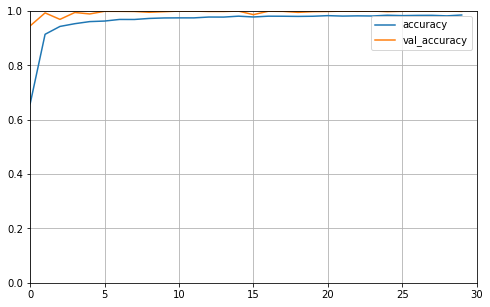

In [19]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)

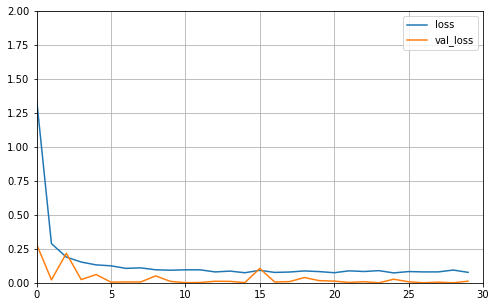

In [20]:
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [21]:
def load_and_preprocess_single_img(path):
    # read the img through file path
    image = tf.io.read_file(path)  
    image = tf.image.decode_jpeg(image, channels=3)
    # 原始图片大小为(128, 128, 3)，重设为(32, 32)
    image = tf.image.resize(image, [32, 32])  
    image = tf.cast(image, tf.float32) / 255.0  # 归一化到[0,1]范围
    image = np.expand_dims(image, axis = 0) # since you have batch_size, so you need to expand your image
    return image

In [22]:
def evaluate_single_pic(path, show=False):
    
    if show:
        import matplotlib.image as mpimg
        plt.imshow(mpimg.imread(path))
    image = load_and_preprocess_single_img(path)
    predict_result = model.predict(image)
    print("This is", label_names[np.argmax(predict_result, axis=1)[0]])

In [23]:
model.save_weights('./checkpoints/my_checkpoint')

In [24]:
model.save('./ban_face_recognition_model.h5')

In [25]:
# test_pic_path2 = "./lol_data_1/test_2/18.png"
# evaluate_single_pic(test_pic_path2, True)